# Imports

In [1]:
# system
import os
import pickle
import gzip
# data
import numpy as np
import pandas as pd
from sklearn.datasets import fetch_covtype
from sklearn.model_selection import train_test_split
# model
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
# evaluation
from sklearn.metrics import accuracy_score
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Load Data

In [2]:
dataset = fetch_covtype()

In [3]:
X, y = dataset.data, dataset.target

In [4]:
X.shape, y.shape

((581012, 54), (581012,))

In [5]:
def train_validate_test_split(X, y, *args, **kwargs):  
    X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, *args, **kwargs)    
    X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, *args, **kwargs)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [6]:
X_train, X_val, X_test, y_train, y_val, y_test = train_validate_test_split(X, y, random_state=42)

In [7]:
print([item.shape for item in (X_train, X_val, X_test, y_train, y_val, y_test)])

[(326819, 54), (108940, 54), (145253, 54), (326819,), (108940,), (145253,)]


# Preview

In [8]:
print(dataset.DESCR)

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30Ã—30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like object
with the feature matrix in the ``data`` member
and the target values in ``target``.
The dataset will be 

In [9]:
X_train[0]

array([2.268e+03, 3.540e+02, 3.000e+01, 1.200e+02, 7.100e+01, 1.201e+03,
       1.560e+02, 1.730e+02, 1.440e+02, 6.740e+02, 0.000e+00, 0.000e+00,
       0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])

In [10]:
y_train

array([3, 2, 2, ..., 2, 3, 1])

<AxesSubplot:>

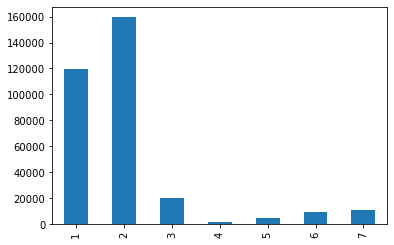

In [11]:
pd.Series(y_train).value_counts().sort_index().plot(kind='bar')

# Model

In [12]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, n_jobs=-1, verbose=1)    

In [13]:
%%time
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   21.7s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  1.6min


Wall time: 1min 40s


[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  1.7min finished


RandomForestClassifier(min_samples_split=50, n_estimators=200, n_jobs=-1,
                       verbose=1)

In [14]:
y_val_pred = model.predict(X_val)
val_acc = accuracy_score(y_val, y_val_pred)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.3s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    1.8s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    1.9s finished


In [15]:
print(f'Validation Accuracy: {val_acc:.2%}')

Validation Accuracy: 90.25%


# Evaluation 

In [16]:
test_acc = accuracy_score(y_test, model.predict(X_test))
print(f'Test Accuracy: {test_acc:.2%}')

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.4s


Test Accuracy: 90.30%


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.5s finished


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.5s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    2.3s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    2.4s finished


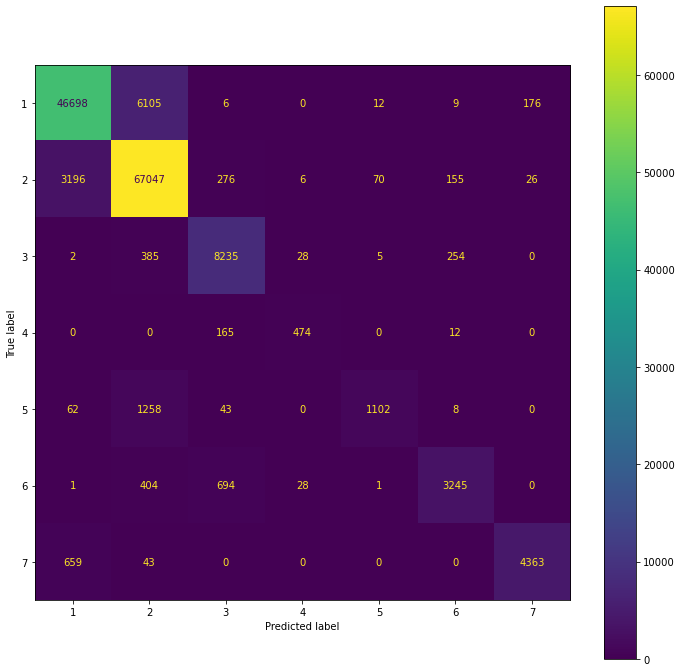

In [17]:
plot_confusion_matrix(model, X_test, y_test, ax=plt.figure(figsize=(12,12)).gca())

# Application

In [18]:
def application(idx=None):
    if idx is None:
        idx = np.random.randint(X_test.shape[0])
    print('Collected new features as follows:')
    print(X_test[idx])
    forecasted = model.predict(X_test[idx:idx+1])[0]
    actual = y_test[idx]
    print(f'\n{"CORRECT" if forecasted==actual else "WRONG"}')
    print(f'\nModel forecasted as {forecasted}')
    print(f'\nActual data should be {actual}')

In [19]:
application()

Collected new features as follows:
[2.843e+03 3.040e+02 4.200e+01 6.850e+02 4.660e+02 7.650e+02 7.700e+01
 1.810e+02 2.260e+02 2.244e+03 0.000e+00 0.000e+00 1.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 1.000e+00 0.000e+00 0.000e+00
 0.000e+00 0.000e+00 0.000e+00 0.000e+00 0.000e+00]

CORRECT

Model forecasted as 2

Actual data should be 2


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    0.0s finished
